# UNIDAD 3: Análisis de sentimientos

En esta notebook veremos cómo abordar el análisis de sentimientos a nivel de oración.


<b> Descripción del Dataset</b>

- Título: Disneyland Reviews

- Fuente: https://www.kaggle.com/datasets/arushchillar/disneyland-reviews

 Utilizaremos el dataset <i>DisneylandReviews.csv</i> que está disponible en la plataforma <i>Kaggle</i>. El dataset contiene opiniones sobre tres de los parques temáticos que tiene Disney, en concreto en las ciudades de Paris, Hong Kong y California.

El dataset se tiene en 6 columnas:


- <b>Review_ID</b>: identificación única proporcionada a cada reseña.<br>
- <b>Rating</b>: calificación que va desde 1 (insatisfecho), hasta 5 (satisfecho).<br>
- <b>Year_Month</b>: año y día de cuando el turista visitó el parque temático.<br>
- <b>Reviewer_Location</b>: país de origen del visitante.<br>
- <b>Review_Text</b>: texto del comentario realizados por el visitante.<br>
- <b>Branch</b>: ubicación del parque calificado.<br>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


## 1. Preparación del dataset: pre-procesamiento de texto


En este primer apartado realizaremos la carga del dataset original, seleccionaremos un subconjunto de los registros y prepararemos el texto de los comentarios antes de realizar el análisis.

## 1.1 Carga y creación del dataset

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 300)

# Cargamos el archivo de comentarios:
dl = pd.read_csv('./DisneylandReviews.csv', encoding = "ISO-8859-1")
print(dl.shape) # Dimensión del dataset
dl.head()

(42656, 6)


,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides its a Small World is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy b...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,"Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Ant...",Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,"Thanks God it wasn't too hot or too humid when I was visiting the park otherwise it would be a big issue (there is not a lot of shade).I have arrived around 10:30am and left at 6pm. Unfortunately I didn t last until evening parade, but 8.5 hours was too much for me. There is plenty to do and...",Disneyland_HongKong
3,670607911,4,2019-4,Australia,"HK Disneyland is a great compact park. Unfortunately there is quite a bit of maintenance work going on at present so a number of areas are closed off (including the famous castle) If you go midweek, it is not too crowded and certainly no where near as bus as LA Disneyland. We did notice on this ...",Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1 hour from Kowlon, my kids like disneyland so much, everything is fine. but its really crowded and hot in Hong Kong",Disneyland_HongKong


Como observamos, el tamaño del dataset contiene más de 42K comentarios. Para un primer experimento vamos a concencentrarnos en el análisis de un subconjunto del dataset: filtraremos solo comentarios de **Disneyland_Paris**



In [3]:
#Seleccionamos las filas y columnas con las que trabajaremos:

data = dl[dl['Branch']== 'Disneyland_Paris']

data = data[['Rating', 'Review_Text']]

print(data.shape)

data.sample(5) 

(13628, 2)


,Rating,Review_Text
35891,5,We had a fantastic 5 days hopping between both parks. Can't wait to return. My daughter had a great time meeting all the characters and princesses. Can't wait to return
33496,4,"We are Disney fans. This was very Disney in feel. We managed to accomplish everything we wanted, that was not under refurbishment, in both parks in one very long 13 hour day! Glad we went! It was fun. Most lines were under 20 minutes. Except Crushes Coaster, one hour, but with the wait. Like no ..."
41409,4,Great Place Great rides but it is crowded be sure to reach early !!
35801,3,"I have a nine year old son with ADHD, Tourette's Syndrome and OCD. The special pass given to us was invaluable, but the attitude of some of the ride staff was appalling. On visiting the Ratatouille ride my son was asked to pick up his 3d glasses, because of his OCD he picked them up from the bac..."
31092,5,"Disneyland is so beautiful and large.To see all you need to stay there at least 3 days,as there is a lot of people and large quits, but it is worth it! Very good organized! We have the best holidays experience!"


Por tanto, vamos a trabajar con 13628 comentarios.

<Axes: >

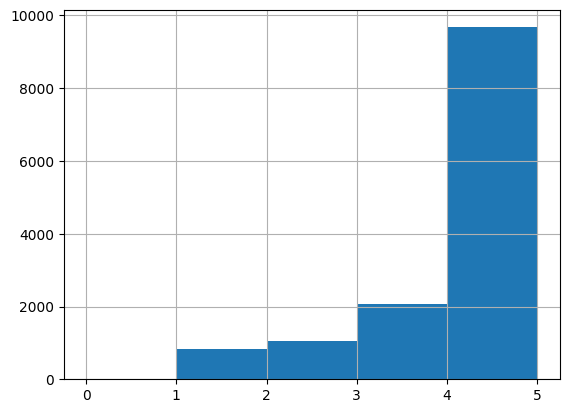

In [4]:
#Graficamos un histograma para tener una idea de la distribución de calificaciones numéricas:

data.Rating.hist(bins=[0,1,2,3,4,5])

Como observamos en el histograma, hay más calificaciones positivas (de 4 puntos o más). 

Para seguir con la tarea de clasificación binaria, necesitaremos sólo las opiniones que tienen las calificaciones más altas y las más bajas, por ello, vamos a seleccionar las filas que cumplan estas características:

- Las opiniones cuya calificación sea mayor que 3 serán etiquetadas con '1', mientras que etiquetaremos con '0' las opiniones que tengan una calificación menor a 3. Las etiquetas se asignan a la columna <b>sentiment</b>.


In [6]:
# Creación de una nueva columna: sentiment

cond = data['Rating'] != 3  # Descartar reseñas neutrales (calificación = 3)
data = data.loc[cond]

data['sentiment'] = data['Rating'].apply(lambda x : 1 if x > 3 else 0)

print(data.sentiment.value_counts()) # Calificaciones por clase.

print(data.shape) # Tamaño final del dataset

sentiment
1    9674
0    1872
Name: count, dtype: int64
(11546, 3)


In [7]:
data.sample(10) # Muestra de clalificaciones realizadas a la sucursal de Paris

,Rating,Review_Text,sentiment
31112,5,"Located 30 minutes from centre of Paris, Disneyland has two parks, Disneyland Park and Walt Disney Studio. If you go to both parks in one day, I recommend you to start in Walt Disney Studio, because it close at 7pm and Disneyland Park closes at 10pm. In Walt Disney Studio I loved the Hollywood T...",1
41597,1,The scenes were the only thing that was good! We were glad to be home away from all that pushing and shoving (people will push you to the ground even if you are carrying a 8 month baby in your arms! this is one eg what happened to me) And the buses needed to run more regular at the end of the ...,0
40386,5,"We visited Disney as a group of 4 from the 12th 16th November on the 2 nights free package, the parks were lovely as the Christmas season had started and pretty quiet due to a lack of European school holidays always try to avoid times when there are French school holidays as they make insanely...",1
39267,5,"Arrived at 9.30am, left 12.30am after finale, all the hours inbetween are a bit of a blur! The weather was poor but this made no diference at all, what a fantastic place. Leave the budget at home, splurge on whatever you want and get stuck into it. Superb rides that we hardly had to queue for, l...",1
36983,5,"Took my three young children in January 2015. Really wasn't keen but went for the family experience. I was so surprised by how I ended up buying into the Disney dream. The scale of it, the quality of the rides and the ... I can't believe I'm writing this ... the magic! The kids absolutely loved ...",1
39651,2,We have been to Disneyland Paris 5 times with our children and usually love it but I have to say that this was definitely the last time! Half the rides were closed and the prices had gone up so much since last year it wasn't even funny. It was roughly 16 for burger and chips a small bottle of ...,0
42349,5,"First went to Eurodisney ( as it was then called) just after it opened. Stayed at the Newport Bay Club hotel for 5 days and had a great time, despite the bad press it was getting. Our sons were age 2 and 6. We returned every year for 5 or 7 days, although there was only the Magic Kingdom park th...",1
30240,5,"Great visit with a friend again, short wait times and the parade was good! Illumination at 11pm I would recommend",1
35967,4,Enjoyed the two days in the park. Very busy but to be expected. Be prepared to pay through the nose for food. Had dinner in planet hollywood which was average and dinner in rainforest cafe which was yum and great choice on the menu. Average 100 to 150 euros for a meal for four.,1
40922,4,"Well, it was a great day out and a real surprise for my children as they thought we had got on the wrong train to get to Notre Dame Catherdral. We visited Eurodisney on the first day in Paris as the weather was good and the day we had thought we would go later in the week had rain forecast. So I...",1


A partir del dataset creado realizaremos las siguientes tareas.

## 1.2 Limpieza de texto:
Antes de trabajar con los textos de las reseñas, hay que limpiarlos. Exploremos si hay comentarios con direcciones para identificar ésta y otras  tareas de limpieza que necesitamos aplicar:

In [8]:
#Presentar la primera reseña que incluye una dirección web:
data[data['Review_Text'].str.contains('http', case=False, na=False)].iloc[0].Review_Text


"Hi allHaving just returned from DLP I thought it might be useful to write a short idiots guide with some of the info I wish I'd known before I went.Firstly   getting there. We drove (going through the chunnel) so if you're flying we can't help you with this bit. Our Satnav got us there no problem and most people will have some form of access to a satnav these days. There are signs to DLP but they are few and far between so don't rely on them to guide you there. There is also a very good guide that we used to get us there. It's here under post number 9: https://www.tripadvisor.co.uk/ShowTopic-g226865-i2224-k5776128/Driving-to-DLP-and-advise-please-Marne-la-Vallee-Seine-et MarneIle-de-France.html Be aware of the advice about 3 4 of the way down where you need to be in the fast lane to get to the right road   this is easy to miss and the French tend to drive nose to tail so changing lanes can be traumatic! There are guides to avoiding the toll on the A1 but, given what you're spending on

Si observamos la primera reseña, nos daremos cuenta de que necesitamos quitar algunos signos de puntuación, quitar URls, números, completar contracciones y otras tareas.

Vamos a definir una función general para agupar a todas las tareas de limpieza.


In [10]:
# Importar librerías necesarias:

import re
from bs4 import BeautifulSoup
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re
from bs4 import BeautifulSoup
import string
from nltk.stem import WordNetLemmatizer


def remove_urls(text):
	#Quitar URLs
	url_pattern = re.compile(r'https?://\S+|www\.\S+')
	return url_pattern.sub(r'', text)

def remove_emoji(text):
	# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_hashtags_mentions(text):
    # Expresión regular para eliminar hashtags y menciones
    text_cleaned = re.sub(r'[@#]\w+', '', text)
    # Elimina espacios adicionales que pudieran quedar tras la limpieza
    text_cleaned = re.sub(r'\s+', ' ', text_cleaned).strip()
    return text_cleaned

def remove_html(text):
	#Limpiar código HTML
    return BeautifulSoup(text, "lxml").text


def remove_punctuation(text, punctuation):
    #Verificar letra a letra y juntar todo el texto
    punctuationfree = "".join([i for i in text if i not in string.punctuation]) 
    return punctuationfree

def remove_numbers(text):
    """ Remover números """
    text = ''.join([i for i in text if not i.isdigit()])
    return text

def replace_strings(text, patterns):
	# Reemplazar ciertas cadenas de texto por otras
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text) #specifies strings or a set of strings or patterns that match it
    return text


#defining the function to remove stopwords from tokenized te
def remove_stopwords(text, stopwords):
    output= [i for i in text if i not in stopwords]
    return output

def stemming_es(token):
	# stemming the texto en español:
    es_stemmer = SnowballStemmer('spanish') # for english
    return es_stemmer.stem(token) # Para una palabra en español
     

def stemming_eng(text):
	# stemming the texto en inglés:
    eng_stemmer = PorterStemmer() # for english
    stem_text = [eng_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer_eng(text, wordnet_lemmatizer):
	#defining the function for lemmatization:
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

# Aplicar tareas de limpieza de texto que hagan falta:

def prep_dataset_DL(df, new_col, raw_col):
    
    #Convertir el texto en minúsculas:
    df[new_col]= df[raw_col].apply(lambda x: x.lower())
    
    #Eliminar URLs:
    df[new_col]= df[new_col].apply(lambda x:remove_urls(x))
    
    #Eliminar signos de puntuación:
    PUNCTUATION = """!"#$%&()*+,-./:;<=>?@[\]^_`{|}~"""
    df[new_col]= df[new_col].apply(lambda x:remove_punctuation(x, PUNCTUATION))
    
    #Eliminar números:
    df[new_col]= df[new_col].apply(lambda x:remove_numbers(x))
    
    # Reemplazar cadenas de texto por equivales (como las contracciones):
    contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'can not'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                             (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
    
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    df[new_col]= df[new_col].apply(lambda x:replace_strings(x, patterns))
    
    # Tokenizar texto:
    wordnet_lemmatizer = WordNetLemmatizer() #defining the object for Lemmatization
    df[new_col]= df[new_col].apply(lambda x: word_tokenize(x))
    
    #Eliminación de palabras vacias:
    STOPWORDS = nltk.corpus.stopwords.words('english')
    STOPWORDS = STOPWORDS + ['hi', 'ok', 'u', 'well', 'oh', 'ltgt', 'im', 'r']
    df[new_col]= df[new_col].apply(lambda x: remove_stopwords(x, STOPWORDS))
    
    #Lematizar:
    wordnet_lemmatizer = WordNetLemmatizer() # #defining the object for Lemmatization
    df[new_col]=df[new_col].apply(lambda x:lemmatizer_eng(x, wordnet_lemmatizer))
    
    #Convertir la lista de tokens a string preprocesado:
    df[new_col] = [' '.join(w) for w in df[new_col].to_list()]
    return df
# Observar el resultado:
dataP = data.copy()
dataP = prep_dataset_DL(dataP, 'text', 'Review_Text')


In [11]:
dataP
#dataP.sample(5, random_state = 42)

,Rating,Review_Text,sentiment,text
29026,5,"We've been to Disneyland Hongkong and Tokyo, so far this one is the best. We're looking forward to visit the biggest one in Orlando. 1 day is not enough, it is recommended to stay in Disney Hotel Resort so you can enjoy the fast track save huge amount of time, if you're not staying there, plan...",1,weve disneyland hongkong tokyo far one best looking forward visit biggest one orlando day enough recommended stay disney hotel resort enjoy fast track save huge amount time youre staying plan strategize visit getting fast track pass kiosk nearby attraction come back time ride projection firework...
29027,4,"I went to Disneyland Paris in April 2018 on Easter weekend, I know it says June 2018 but I can't choose a date before then, and I loved it, me and my mum went and as I have autism we managed to get a disability pass for both parks. Disney are excellent with disability access and cater to all typ...",1,went disneyland paris april easter weekend know say june cant choose date loved mum went autism managed get disability pas park disney excellent disability access cater type disability visible wheelchair user etc invisible autism etc managed get lot ride pas queue normal queue entrance disabilit...
29028,5,"What a fantastic place, the queues were decent as this is the best time of year to go apparently, we managed to see almost everything, I was a bit disappointed the Haunted Mansion wasn't open but it can not be helped! The fireworks were amazing and the parade was so entertaining!A definite must ...",1,fantastic place queue decent best time year go apparently managed see almost everything bit disappointed haunted mansion wasnt open helped firework amazing parade entertaininga definite must disney lover
29029,4,"We didn't realise it was school holidays when we went, so consequently it was extremely busy with ride wait times of up to 95 minutes or more, which was disappointing. We only went on 2 rides (Indiana Jones & the Temple of Doom which was fast & furious fun & Pirates of the Caribbean which was am...",1,didnt realise school holiday went consequently extremely busy ride wait time minute disappointing went ride indiana jones temple doom fast furious fun pirate caribbean amazing enjoyed also liked walking aladdin enchanted passage different world colourful done heaven kid adult alike ate silver sp...
29030,5,A Trip to Disney makes you all warm and fuzzy and an actual kid again. It's not as big as the US one but makes a fun filled happy day out. We went on the rides possible and they were incredible. By the end of the day you are exhausted but nothing a good coffee won't solve to get you till the fir...,1,trip disney make warm fuzzy actual kid big u one make fun filled happy day went ride possible incredible end day exhausted nothing good coffee solve get till firework show start magical enchanting take back kid watching favorite disney movie minute cautious though day trip last train pm literall...
...,...,...,...,...
42651,5,i went to disneyland paris in july 03 and thought it was brilliant. i visited all the hotels and stayed in the newport bay and also the kyriad hotels. the newport is a really nice hotel within walking distance of the parks. very big hotel. the kyriad is further away but still a really nice hotel...,1,went disneyland paris july thought brilliant visited hotel stayed newport bay also kyriad hotel newport really nice hotel within walking distance park big hotel kyriad away still really nice hoteli saw room hotel pretty much thought park brill july didnt really queue much thought food expensive ...
42652,5,"2 adults and 1 child of 11 visited Disneyland Paris beginning of Feb 04 and had an absolute fantastic time.We went on a Thursday for 3 nights and there were no queues until the Saturday when lots more people seemed to arrive.We stayed in the Sequioa Lodge which was really nice, drinks in the hot...",1,adult child visited disneyland paris beginning feb absolute fan

# 2. Clasificación: Crear un clasificador automático de opiniones positivas y negativas.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<i>Primer paso</i>: Crea dos listas: una con los textos y otra con las etiquetas de valoración (0 y 1).
</div>

In [12]:
opinions = dataP.text # unir todos los tokens de un mensaje en un solo string
labels = data['sentiment'].to_list()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">

<i>Segundo paso</i>: Vectorizamos las opiniones con un vectorizador tf.idf, usando 'word' como analyzer.

</div>

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    analyzer= 'word',
 )

X = vectorizer.fit_transform(opinions)

opinions_vector_matrix = X.toarray()

opinions_vector_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<i>Tercer paso</i>: Preparar el corpus de entrenamiento y test, y entrenar un clasificador con Logistic Regression.
</div>

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(opinions_vector_matrix, labels, test_size=0.2, random_state=42)

# Entrenar el modelo
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<i>Cuarto paso</i>: Utilizar el modelo entrenado para predecir la categoría 1 (positivo) o 0 (negativo) de las opiniones del conjunto de test y mostrar las palabras más informativas para cada categoría.
</div>

In [15]:
# %%
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = logistic_model.predict(X_test)

# Métricas de evaluación
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Matriz de Confusión:
 [[ 225  175]
 [  19 1891]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.56      0.70       400
           1       0.92      0.99      0.95      1910

    accuracy                           0.92      2310
   macro avg       0.92      0.78      0.82      2310
weighted avg       0.92      0.92      0.91      2310



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<i>Quinto paso</i>: Mostrar las palabras <b>más informativas</b> para cada categoría.
</div>

In [22]:
print(vectorizer.get_feature_names_out())
print(logistic_model.classes_)
print(logistic_model.coef_)
print(logistic_model.coef_[0][0])

['aa' 'aaa' 'aaahs' ... 'zurg' 'zurgs' 'zurich']
[0 1]
[[ 0.02626881  0.          0.01824426 ...  0.01173976  0.00715113
  -0.04372392]]
0.02626880553333234


In [ ]:
def most_informative_feature_for_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names_out() # Obtener el vocabulario
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n] # coeficiente de cada palabra del vocabulario: classifier.coef_[0]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)
        
most_informative_feature_for_classification(vectorizer, logistic_model)

0 -5.101148463751575 money
0 -3.982035451242198 poor
0 -3.896605054490257 closed
0 -3.6260149550300307 hour
0 -3.36257901904183 rude
0 -3.284302839562604 disappointed
0 -3.1836434502475477 waste
0 -3.021474824088382 staff
0 -2.993734422486426 dirty
0 -2.850408416253118 told
1 5.777708186679882 great
1 4.925988714976113 amazing
1 4.393148346198249 loved
1 3.378822620325672 fantastic
1 3.033362567581125 magical
1 2.7220940507663034 good
1 2.7052835693766304 lot
1 2.603135655400223 time
1 2.557415286540539 firework
1 2.554058690330339 enjoyed


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Identificar sobre qué aspectos se hacen valoraciones negativas.
</div>
<br>
<i>Primer paso<i>: Elegir dos palabras más informativas de la categoría 0 (negativo) y filtar un conjunto de opiniones en las que aparezcan estas palabras. Preprocesar las opiniones quitando los caracteres de salto de línea.


In [23]:
characters2delete = ['\n', '\r', '..']

def preprocess(text):
    for c2d in characters2delete:
        text = text.replace(c2d, '')
    return text

df_neg = data[(data['Review_Text'].str.contains('poor|staff')) & (data['sentiment']==0)]
neg_opinions = df_neg['Review_Text'].to_list()[:100]

neg_opinions = [preprocess(opinion) for opinion in neg_opinions]
neg_opinions[:2]

["We booked tickets on line for Disneyland, this is something I recommend, the lines were already long when we got there, so booking your tickets in advance does help.I was advised to buy a fast passes, but i decided not to, because it was not clear to me on the website if this also counted as an entrance ticket, meaning; a total price of 90 euro with entrancevinstead or 74 or 68 or an extra 90 euro's, depending on age of child.But even if we would have, the lines were long there as well, and also, what kind of system is this? People that do not have that much to spend will be held back, because people with money obviously can skip the lines.absolutely ridiculous.Getting something to eat was horrible, again lines everywhere.just to eat someting right.And don't get me started on the staff, trying to figure out the amount of 3 icecreams with a small casio computer, and not being able to, or very rude staff. Only 2 ladies were friendly, have to be honest. All in all, very disappointing, l

<i>Segundo paso</i>: Utilizar el diccionario de opiniones (archivo AFINN-111) para extraer la polaridad de cada opinión como la media de los valores de las opinion words del texto.

In [26]:
re.split("\s+", "abc   -1")

['abc', '-1']

In [34]:
re.split("\s+(-?\d+)", "limited\t-1")[:2]

['limited', '-1']

In [36]:
#Creamos una lista de opinion words y pesos a partir del diccionario AFINN
opinion_words_file = './AFINN-111.txt'

opinion_words = []
words_and_opinions = {}
with open(opinion_words_file, 'r') as of:
    ol = of.readlines()
    for wo in ol:
        wo_split = re.split("\s+(-?\d+)", wo)[:2]
        if len(wo_split) < 2:
            continue
        w, o = wo_split
        words_and_opinions.update({w:o})
        opinion_words.append(w)

def get_polarity(opinion):
    tokens = nltk.word_tokenize(opinion.lower())
    lst = [token for token in tokens if token in opinion_words]
    lst = [int(words_and_opinions[el]) for el in lst]
    if len(lst) != 0:
        return sum(lst)/len(lst)
    else:
        return 0

polarities = []

for opinion in neg_opinions:
    polarities.append(get_polarity(opinion))

polarities[:10]


[0.2727272727272727,
 1.3333333333333333,
 -0.875,
 -1.25,
 -1.0,
 1.0,
 0.36666666666666664,
 0.0625,
 0.5454545454545454,
 0.2727272727272727]

<i>Tercer paso:</i> Seleccionar opiniones con polaridad negativa más alta, que ejemplifiquen los aspectos peor valorados. ¿Cuáles son estos aspectos?

In [37]:
opinions2analyze_aspect = []

for i in range(len(neg_opinions)):
    if polarities[i] < -0.5:
        opinions2analyze_aspect.append(neg_opinions[i])

print("\n".join(opinions2analyze_aspect[:3]))


Its a shame this park carry the name Disney. They build the place years back and they are now just collecting cash without any effort, it does not compare in anything with the American parks which are truly amazing. The whole park now is designed to get money from their guests on every step without offering any services. The staff are truly miserable and seems like they hate their job. In the whole park there were no characters walking around at all so a kid can take a picture. There were 3 characters who a kid could meet in the whole park but you had to wait forever just to take a picture. Many rides where closed and the wait time for anything was 60 minutes or more, who in the world can make a a kid stand still in a waiting line for 60 Minutes or more? Avoid at all costs especially if you have young children. PS. Parking is    30 to park 30 minutes walk from the entrance after spending    75 person for your ticket.just ridiculous 
I know Disneyland is a money machine but hadn   t rea

In [ ]:
print("\n\nDe lo observado, ¿cuáles son los aspectos peor valorados: ")

#############################################
# SOLUCIÓN                                  #
#############################################




### Evaluación del modelo de regresión logística



<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
    
Obtener los resultados de las métricas de evaluación del clasificador basado en regresión logística: matriz de confusión y métricas por clase. Discutir los resultados.
</div>

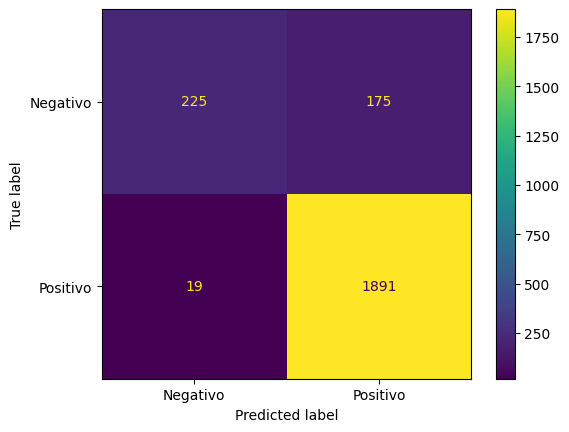

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

# Mostrar matriz de confusión gráficamente
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Negativo", "Positivo"])

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
Entrenar un nuevo clasificador, por ejemplo, usar SVM, y obtener sus métricas con el conjunto de test
    
</div>

In [39]:
from sklearn.svm import SVC

# Crear y entrenar el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predicciones SVM
y_pred_svm = svm_model.predict(X_test)

# Métricas de evaluación para SVM
print("Matriz de Confusión (SVM):\n", confusion_matrix(y_test, y_pred_svm))
print("\nReporte de Clasificación (SVM):\n", classification_report(y_test, y_pred_svm))


Matriz de Confusión (SVM):
 [[ 281  119]
 [  40 1870]]

Reporte de Clasificación (SVM):
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       400
           1       0.94      0.98      0.96      1910

    accuracy                           0.93      2310
   macro avg       0.91      0.84      0.87      2310
weighted avg       0.93      0.93      0.93      2310



### Prueba del modelo en otra parte del dataset

Según se indicó al inicio, como parte de la preparación del dataset elegimos únicamente a las reseñas de Disneyland Paris. En este punto intentaremos ver cómo funciona el clasifidor con las reseñas realizadas en otro subconjunto de datos. Por tanto, implementar el código necesario para responder la pregunta.

¿El mejor modelo de clasificación creado (basado en regresión logística o SVM), a partir de este subconjunto de texto es igual de preciso para clasificar las reseñas de otra de las dos divisiones de Disneyland, esto es, Hong Kong o California?.



In [42]:
dl['Branch'].sample(10)

38736         Disneyland_Paris
32736         Disneyland_Paris
19905    Disneyland_California
18916    Disneyland_California
16529    Disneyland_California
34399         Disneyland_Paris
25348    Disneyland_California
7890       Disneyland_HongKong
19071    Disneyland_California
31004         Disneyland_Paris
Name: Branch, dtype: object

In [44]:
# Filtrar otro subconjunto de datos
data_hk = dl[dl['Branch'] == 'Disneyland_HongKong']
data_hk = data_hk[['Rating', 'Review_Text']]
data_hk = data_hk[(data_hk['Rating'] != 3)]
data_hk['sentiment'] = data_hk['Rating'].apply(lambda x: 1 if x > 3 else 0)

# Preprocesar el nuevo conjunto de datos
data_hk_processed = prep_dataset_DL(data_hk, 'text', 'Review_Text')

# Vectorizar opiniones
opinions_hk = data_hk_processed['text']
X_hk = vectorizer.transform(opinions_hk)

# Predicciones y evaluación
y_hk = data_hk['sentiment'].to_list()
y_pred_hk = logistic_model.predict(X_hk)

print("\nReporte de Clasificación para Hong Kong (Regresión Logística):\n", classification_report(y_hk, y_pred_hk))


Reporte de Clasificación para Hong Kong (Regresión Logística):
               precision    recall  f1-score   support

           0       0.90      0.22      0.35       508
           1       0.95      1.00      0.97      7746

    accuracy                           0.95      8254
   macro avg       0.92      0.61      0.66      8254
weighted avg       0.95      0.95      0.94      8254



In [ ]:
y_pred_hk_svm = svm_model.predict(X_hk)
print("\nReporte de Clasificación para Hong Kong (SVM):\n", classification_report(y_hk, y_pred_hk_svm))